# What's Been Happing in Laois, Offaly and Kildare

In [1]:
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter


import pandas as pd
import numpy as np

from loguru import logger
import pycountry

from matplotlib.pylab import plt
import seaborn as sns




%matplotlib inline

# Load the Ireland Dataset

In [2]:
base_ireland_dataset = '../../generating_covid_datasets/data/base_ireland.pkl'

df = pd.read_pickle(base_ireland_dataset).set_index('date')
df.shape, df.index.max()

((5174, 10), Timestamp('2020-09-14 00:00:00+0000', tz='UTC'))

In [3]:
finish_date = datetime(2020, 8, 21)
df = df.loc[:finish_date]
df.shape

(4550, 10)

# Cases per 100k

In [4]:
df['new_cases_per_100k'] = 100000*df['new_cases']/df['population']

# The new cases per 100k for Ireland overall.
new_cases_per_100k_for_ireland =\
    100000*df.groupby('date')['new_cases'].sum()\
    /df.groupby('date')['population'].sum()

df = df.join(pd.DataFrame(new_cases_per_100k_for_ireland, columns=['new_cases_per_100k_for_ireland']))

# Weekly cases per 100k for counties

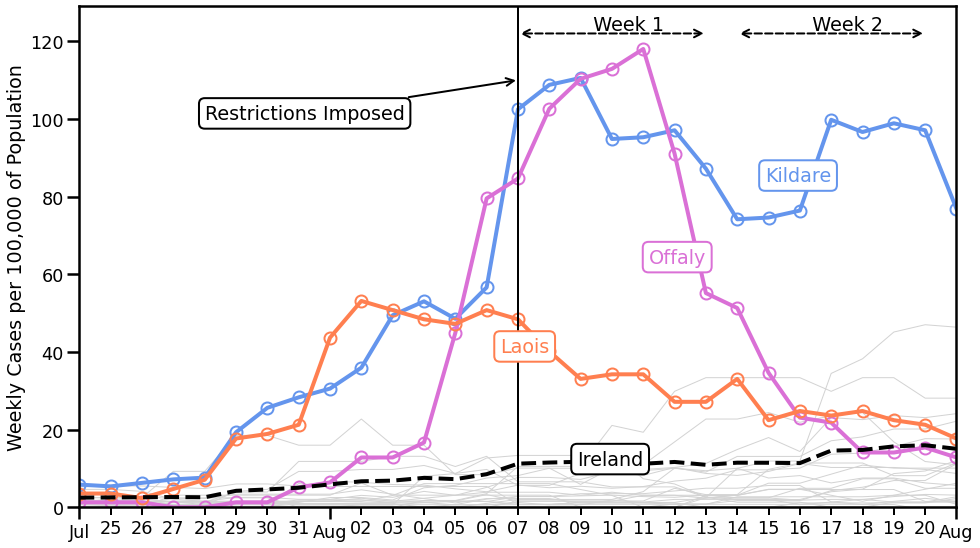

In [5]:
sns.set_context('poster', font_scale=.8)

fig, ax = plt.subplots(figsize=(14, 8))

from_date = pd.Timestamp(2020, 7, 24)
aug_7 = pd.Timestamp(2020, 8, 7)


# Weekly total new cases per 100k for each county
df.groupby('county').apply(lambda g: g['new_cases_per_100k'].rolling('7d').sum().loc[from_date:].plot(ax=ax, c='lightgrey', lw=1))

# Weekly total new cases per 100k for LOK
kildare_new_cases_per_100k = df[df['county']=='Kildare']['new_cases_per_100k'].rolling('7d').sum()
kildare_new_cases_per_100k.loc[from_date:].plot(ax=ax, lw=4, c='cornflowerblue', marker='o', markersize=12, markeredgewidth=2, markerfacecolor='none')

offaly_new_cases_per_100k = df[df['county']=='Offaly']['new_cases_per_100k'].rolling('7d').sum()
offaly_new_cases_per_100k.loc[from_date:].plot(ax=ax, lw=4, c='orchid', marker='o', markersize=12, markeredgewidth=2, markerfacecolor='none')

laois_new_cases_per_100k = df[df['county']=='Laois']['new_cases_per_100k'].rolling('7d').sum()
laois_new_cases_per_100k.loc[from_date:].plot(ax=ax, lw=4, c='coral', marker='o', markersize=12, markeredgewidth=2, markerfacecolor='none')


# Weekly total new cases per 100k for all Ireland
ireland_new_cases_per_100k = new_cases_per_100k_for_ireland.rolling('7d').sum()
ireland_new_cases_per_100k.loc[from_date:].plot(ax=ax, c='k', ls='--', lw=4)

ax.axvline(aug_7, c='k', lw=2)

ax.text(pd.Timestamp(2020, 8, 17), 84, 'Kildare', ha='right', color='cornflowerblue', bbox=dict(edgecolor='cornflowerblue', facecolor='w', boxstyle='round'))
ax.text(pd.Timestamp(2020, 8, 13), 63, 'Offaly', ha='right', color='orchid', bbox=dict(edgecolor='orchid', facecolor='w', boxstyle='round'))
ax.text(pd.Timestamp(2020, 8, 8), 40, 'Laois', ha='right', color='coral', bbox=dict(edgecolor='coral', facecolor='w', boxstyle='round'))

# ax.text(pd.Timestamp(2020, 8, 19), 30, 'Carlow', ha='right', color='green', bbox=dict(edgecolor='green', facecolor='w', boxstyle='round'))

ax.text(pd.Timestamp(2020, 8, 11), 11, 'Ireland', ha='right', color='k', bbox=dict(edgecolor='k', facecolor='w', boxstyle='round'))

ax.annotate('Restrictions Imposed', 
            xy=(pd.Timestamp(2020, 8, 7), 110), 
            xytext=(pd.Timestamp(2020, 7, 28), 100),
            bbox=dict(edgecolor='k', facecolor='w', boxstyle='round'),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", lw=2)
)

# Define the date format
minor_date_form = DateFormatter("%d")
major_date_form = DateFormatter("%b")

ax.xaxis.set_minor_formatter(minor_date_form)
ax.xaxis.set_major_formatter(major_date_form)

 
ax.set_xlabel('')
ax.set_ylabel('Weekly Cases per 100,000 of Population')


ax.set_ylim(0, 129)

# The last day of week 1 and week 2 (both Thursdays since LOK started on a Friday).
last_day_week_2 = datetime(2020, 8, 20)
last_day_week_1 = datetime(2020, 8, 13)

ax.annotate(s='', xy=(aug_7, 122), xytext=(last_day_week_1,122), arrowprops=dict(arrowstyle='<->', lw=2, ls='--'))
ax.annotate(s='', xy=(last_day_week_1+timedelta(days=1), 122), xytext=(last_day_week_2,122), arrowprops=dict(arrowstyle='<->', lw=2, ls='--'))

ax.text(aug_7+timedelta(days=2), 123, '  Week 1')
ax.text(last_day_week_1+timedelta(days=3), 123, '  Week 2')

fig.tight_layout()

fig.savefig('../graphs/lok_cases_by_week.png', format='png')

In [6]:
# The weekly cases on Aug 7 for various counties of interest
[
    df[df['county']=='Laois']['new_cases_per_100k'].rolling('7d').sum().loc[aug_7],
    df[df['county']=='Offaly']['new_cases_per_100k'].rolling('7d').sum().loc[aug_7],
    df[df['county']=='Kildare']['new_cases_per_100k'].rolling('7d').sum().loc[aug_7],
    df[df['county']=='Wexford']['new_cases_per_100k'].rolling('7d').sum().loc[aug_7],
    df[df['county']=='Carlow']['new_cases_per_100k'].rolling('7d').sum().loc[aug_7],
]

[48.40785387912206,
 84.65771347212075,
 102.47006795383453,
 13.358090327406797,
 10.53888849855971]

# Comparing weekly cases per 100k for the last 2 weeks

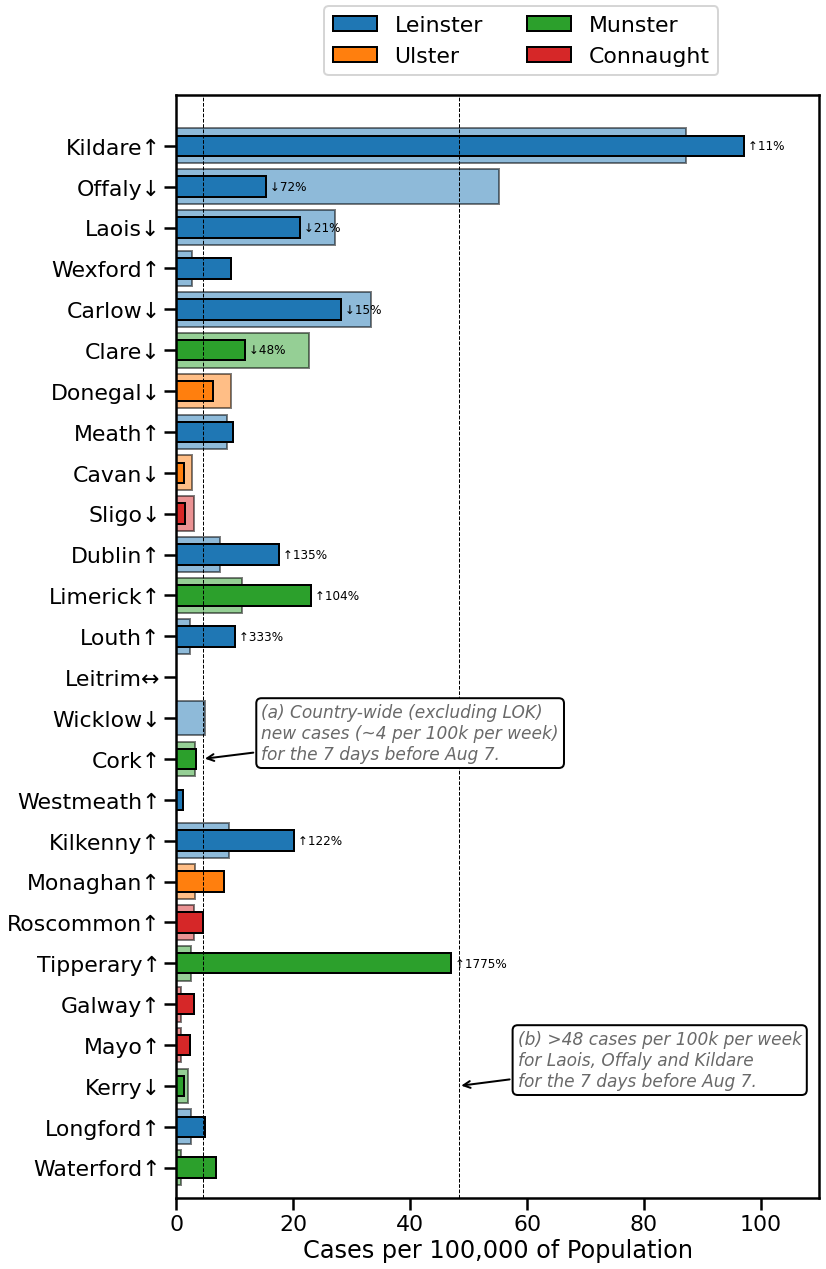

In [7]:
sns.set_context('poster')

fig, ax = plt.subplots(figsize=(12, 18))

# Total weekly cases per 100k by date for each county; esch date is the sum of
# the previous 7 days.
total_cases_per_100k_weekly = df.groupby(['county', 'province'])\
    .apply(lambda g: g['new_cases_per_100k'].rolling('7d').sum()).stack()\
    .reset_index().rename(columns={0:'weekly_new_cases_per_100k'})\
    .set_index('date')


total_cases_per_100k_week_2 = total_cases_per_100k_weekly.loc[last_day_week_2]\
    .reset_index()[['county', 'province', 'weekly_new_cases_per_100k']]\
    .set_index(['county', 'province'])['weekly_new_cases_per_100k']

total_cases_per_100k_week_1 = total_cases_per_100k_weekly.loc[last_day_week_1]\
    .reset_index()[['county', 'province', 'weekly_new_cases_per_100k']]\
    .set_index(['county', 'province'])['weekly_new_cases_per_100k']

# Use this for our ordering -- based on weekly numbers on Aug 7
total_cases_per_100k_aug_7 = total_cases_per_100k_weekly.loc[aug_7]\
    .reset_index()[['county', 'province', 'weekly_new_cases_per_100k']]\
    .set_index(['county', 'province'])['weekly_new_cases_per_100k']\
    .sort_values()


# A colour palette mapped to provinces
palette = dict(zip(df.province.unique(), sns.color_palette("tab10", 4)))

ax.barh(
    'county', 'weekly_new_cases_per_100k', 
    data=total_cases_per_100k_week_1.loc[total_cases_per_100k_aug_7.index].reset_index(), 
    color=total_cases_per_100k_aug_7.reset_index()['province'].map(lambda p: palette[p]),
    height=.85, edgecolor='k', alpha=.5)

ax.barh(
    'county', 'weekly_new_cases_per_100k', 
    data=total_cases_per_100k_week_2.loc[total_cases_per_100k_aug_7.index].reset_index(), 
    color=total_cases_per_100k_aug_7.reset_index()['province'].map(lambda p: palette[p]),
    height=.5, edgecolor='k')


# New cases per 100k for the week before Aug 7 for Ireland excluding LOK
LOK = ['Laois', 'Offaly', 'Kildare']
not_LOK = ~df['county'].isin(LOK)

weekly_new_cases_not_LOK = df[not_LOK].groupby(
    'county').apply(
        lambda g: g['new_cases'].rolling('7d').sum()).stack().groupby('date').sum()

population_not_LOK = df[not_LOK].groupby('county').first()['population'].sum()
weekly_new_cases_per_100k_not_LOK = 100000*weekly_new_cases_not_LOK/population_not_LOK

weekly_new_cases_per_100k_not_LOK_aug_7 = weekly_new_cases_per_100k_not_LOK.loc[aug_7]

ax.axvline(weekly_new_cases_per_100k_not_LOK_aug_7, c='k', lw=1, ls='--')
ax.annotate(
    '(a) Country-wide (excluding LOK)\nnew cases (~{} per 100k per week)\nfor the 7 days before Aug 7.'.format(
        int(weekly_new_cases_per_100k_not_LOK_aug_7)), color='dimgrey', style='oblique',
    xy=(weekly_new_cases_per_100k_not_LOK_aug_7, 10), xytext=(weekly_new_cases_per_100k_not_LOK_aug_7+10, 10),
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", lw=2),
    bbox=dict(edgecolor='k', facecolor='w', boxstyle='round'),
    fontsize=17
)

# Min weekly totals for LOK in week before restrictions
min_lok_week_before_aug_7 = total_cases_per_100k_weekly\
    .reset_index().set_index('county').loc[['Laois', 'Offaly', 'Kildare']]\
    .groupby('date')['weekly_new_cases_per_100k'].min()\
    .loc[aug_7]

ax.axvline(min_lok_week_before_aug_7, c='k', lw=1, ls='--')
ax.annotate(
    '(b) >{} cases per 100k per week\nfor Laois, Offaly and Kildare\nfor the 7 days before Aug 7.'.format(int(min_lok_week_before_aug_7)), color='dimgrey', style='oblique',
    xy=(min_lok_week_before_aug_7, 2), xytext=(min_lok_week_before_aug_7+10, 2),
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", lw=2),
    bbox=dict(edgecolor='k', facecolor='w', boxstyle='round'),
    fontsize=17
)


# Add % change indicators
pct_changes = (100*(1-(total_cases_per_100k_week_2/total_cases_per_100k_week_1))).replace(-np.inf, 0).replace(np.nan, 0)

county_labels = []
for i, (index, _) in enumerate(total_cases_per_100k_aug_7.iteritems()):
    county = index[0]
    num_cases = total_cases_per_100k_week_2.loc[index]
    pct_change = int(pct_changes.loc[index])
    
    change_threshold = 1
    
    if pct_change>change_threshold: 
        if num_cases > 10: ax.text(num_cases, i, ' ↓{}%'.format(pct_change), ha='left', va='center', fontsize=12, color='k')
        county_labels.append('{}↓'.format(county))
    elif pct_change<-change_threshold: 
        if num_cases > 10: ax.text(num_cases, i, ' ↑{}%'.format(np.abs(pct_change)), ha='left', va='center', fontsize=12, color='k')
        county_labels.append('{}↑'.format(county))
    else:
        if num_cases > 10: ax.text(num_cases, i, ' ↔{}%'.format(np.abs(pct_change)), ha='left', va='center', fontsize=12, color='k')
        county_labels.append('{}↔'.format(county))
        
        
# A custom legend
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Patch(facecolor=palette[province], edgecolor='k', label=province)
 for province in df.province.unique()]

ax.legend(handles=legend_elements, ncol=2, bbox_to_anchor=(.86, 1.09))



# The county labels
ax.set_ylim(-.75, len(total_cases_per_100k_aug_7)+.25)
ax.set_yticklabels(county_labels, rotation=0)

ax.set_xlim(0, 110)
ax.set_xlabel('Cases per 100,000 of Population')

fig.tight_layout()

fig.savefig('../graphs/county_cases_last_2_weeks.png', format='png')

In [8]:
# The weekly cases on Aug 20 for various counties of interest
[
    df[df['county']=='Laois']['new_cases_per_100k'].rolling('7d').sum().loc[last_day_week_2],
    df[df['county']=='Offaly']['new_cases_per_100k'].rolling('7d').sum().loc[last_day_week_2],
    df[df['county']=='Kildare']['new_cases_per_100k'].rolling('7d').sum().loc[last_day_week_2],
    df[df['county']=='Wexford']['new_cases_per_100k'].rolling('7d').sum().loc[last_day_week_2],
    df[df['county']=='Carlow']['new_cases_per_100k'].rolling('7d').sum().loc[last_day_week_2],
]

[21.252228532297497,
 15.392311540385657,
 97.07690648258006,
 9.35066322918476,
 28.103702662825853]

# Looking at the big risers

In [9]:
risers = ['Tipperary', 'Kilkenny', 'Dublin', 'Limerick', 'Louth']

risers_palette = dict(zip(risers, sns.color_palette("tab10", len(risers))))

risers_palette

{'Tipperary': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'Kilkenny': (1.0, 0.4980392156862745, 0.054901960784313725),
 'Dublin': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'Limerick': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'Louth': (0.5803921568627451, 0.403921568627451, 0.7411764705882353)}

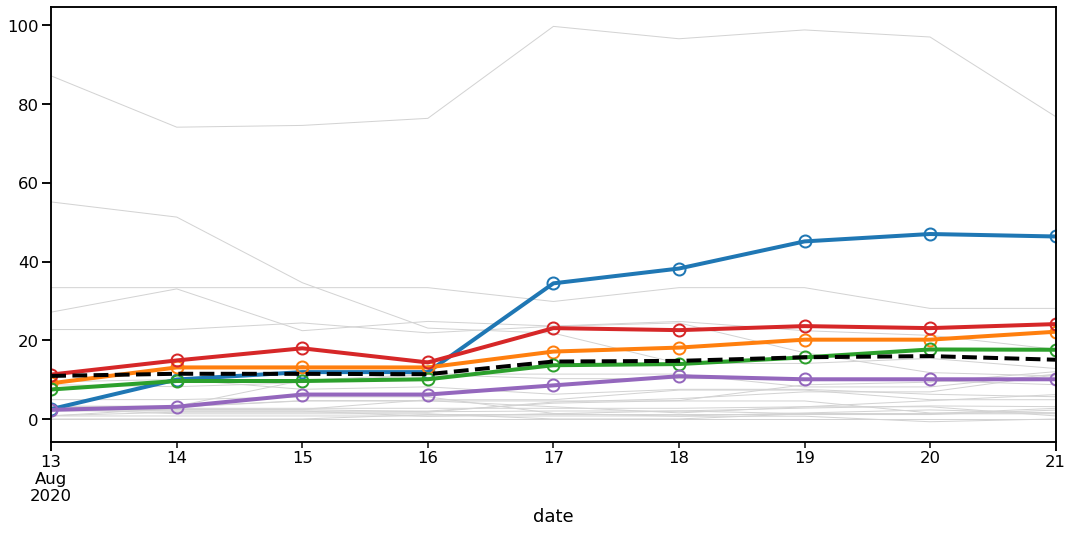

In [10]:
sns.set_context('talk')

fig, ax = plt.subplots(figsize=(18, 8))


# Weekly total new cases per 100k for each county
df.groupby('county').apply(lambda g: g['new_cases_per_100k'].rolling('7d').sum().loc[last_day_week_1:].plot(ax=ax, c='lightgrey', lw=1))

for riser in risers:
    
    riser_new_cases_per_100k = df[df['county']==riser]['new_cases_per_100k'].rolling('7d').sum()
    riser_new_cases_per_100k.loc[last_day_week_1:].plot(ax=ax, lw=4, c=risers_palette[riser], marker='o', markersize=12, markeredgewidth=2, markerfacecolor='none')

# Weekly total new cases per 100k for all Ireland
ireland_new_cases_per_100k = new_cases_per_100k_for_ireland.rolling('7d').sum()
ireland_new_cases_per_100k.loc[last_day_week_1:].plot(ax=ax, c='k', ls='--', lw=4)